In [4]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import local_reversal
from healpy.newvisufunc import projview
from mpl_toolkits.mplot3d import Axes3D

rGC = 8.15

In [6]:
def slice(zwant, x0 = 0.25):
    
    xarray = np.linspace(-1, 1, 500)
    yarray = np.linspace(-1, 1, 500)

    
    xvals = []
    yvals = []
    zvals = []
    cvals = []
    
    
    for x in xarray:
        for y in yarray:
    
            z = zwant
    
            #########################################
            # Calculate the Galactic latitude and longitude
            r = np.sqrt(x*x + y*y + z*z)
            l = np.arctan2(y,x)
            b = np.arctan2(z,r)
    
            l = np.degrees(l)
            if l > 180:
                l = l - 180
            l = np.radians(l)
            #########################################

            # determine if the position (x, y, z) is above or below the reversal
            
            rint = local_reversal.reversal_intersect(l, b, np.radians(168.5), np.radians(-60), x0)
    
            if rint > r or rint < 0:
                # below the reversal clockwise
                a = 1
    
            else:
                # above the reversal counterclockwise
                a = -1

            #########################################
            # calculate the galactocentric azimuthal angle
            xgc = x - rGC
            ygc = y
            zgc = z
            rgc = np.sqrt(xgc*xgc + ygc*ygc + zgc*zgc)
            alpha = np.arctan2(ygc,xgc)

            #########################################
            # get the line of sight B (take the negative to define postive directed towards observer)
            # pitch angle = 11.5 degrees
            # field tilt = 0 degrees
            
            blosval = -local_reversal.B_line_of_sight(l, b, a, alpha, np.radians(11.5), np.cos(b), np.sin(b), np.cos(0), np.sin(0))
    
            if r > 1:
                blosval = np.nan
    
            xvals.append(x)
            yvals.append(y)
            zvals.append(z)
            cvals.append(blosval)


    return np.array(xvals), np.array(yvals), np.array(zvals), np.array(cvals)
        

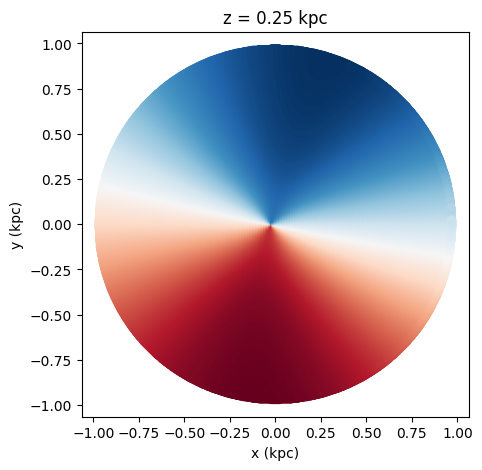

In [11]:
# no reversal, set x0 = 100000

zwant = 0.250
x, y, z, c = slice(zwant, 100000)

plt.figure(figsize = (5, 5))
plt.scatter(x, y, c = c, cmap = "RdBu_r")

plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("z = " + str(zwant) + " kpc");

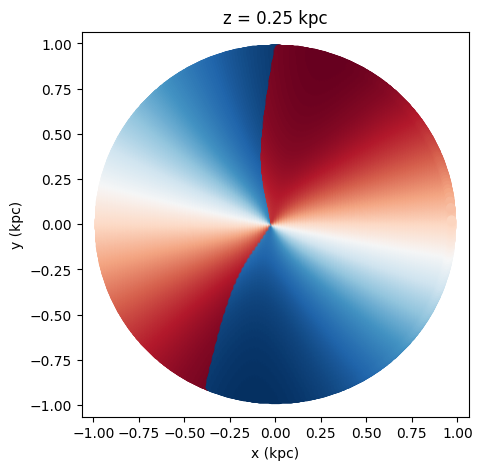

In [12]:
# reversal at x0 = 0.25

zwant = 0.250
x, y, z, c = slice(zwant, 0.25)

plt.figure(figsize = (5, 5))
plt.scatter(x, y, c = c, cmap = "RdBu_r")

plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("z = " + str(zwant) + " kpc");